# Статистика, прикладной поток
## Практическое задание 3

В данном задании вы найдете оценки максимального правдоподобия по реальным данным для некоторых вероятностных моделей, изучите bias-variance разложение, а также исследуете оценки в схеме Бернулли.

**Правила:**

* Дедлайн **21 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 3"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов **O2**
* Задача 2a -  5 баллов **O2**
* Задача 2b -  10 баллов **O2**
* Задача 3 -  15 баллов **O2**
* Задача 4 -  15 баллов **O3**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

__________________
### Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine и загрузите их с помощью библиотеки pandas.

In [2]:
# Так называются столбцы в таблице
column_names = [ 'Alcohol',
                 'Malic acid',
                 'Ash',
                 'Alcalinity of ash',
                 'Magnesium',
                 'Total phenols',
                 'Flavanoids',
                 'Nonflavanoid phenols',
                 'Proanthocyanins',
                 'Color intensity',
                 'Hue',
                 'OD280/OD315 of diluted wines',
                 'Proline']

# Считываем все данные
data = pd.read_csv('wine.data', header=None, names=column_names)


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** 
$$\widehat{a} = \overline{X}$$
$$\widehat{\Sigma} = \frac{1}{n}\sum\limits_{i=1}^n(X_i - \widehat{a})(X_i-\widehat{a})^\top$$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue".
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

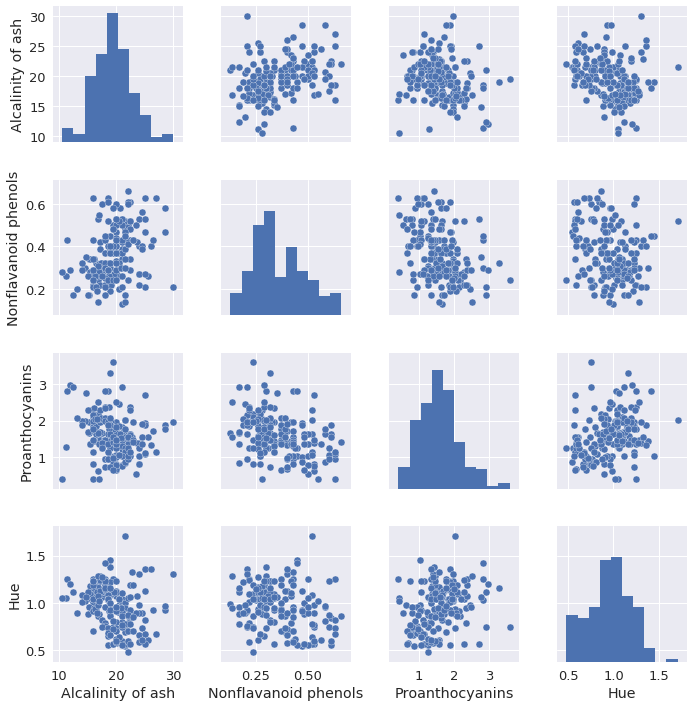

In [3]:
destribution_columns = ["Alcalinity of ash", 
                        "Nonflavanoid phenols", 
                        "Proanthocyanins", 
                        "Hue"]
some_destributions = data[destribution_columns]
some_destributions_np = some_destributions.values

sns.pairplot(some_destributions)

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [4]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    
    return sample.mean(axis=0)

In [5]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    X = sample - sample.mean(axis=0)
    return X.T @ X / X.shape[0]

In [6]:
mu = mle_for_mean(some_destributions_np)
sigma = mle_for_covariance_matrix(some_destributions_np)

Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки.

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня.

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

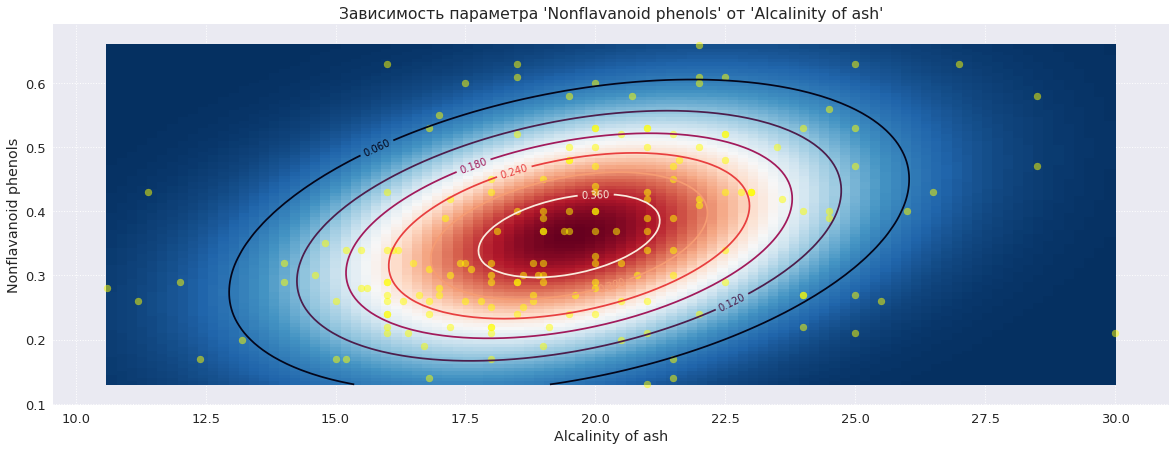

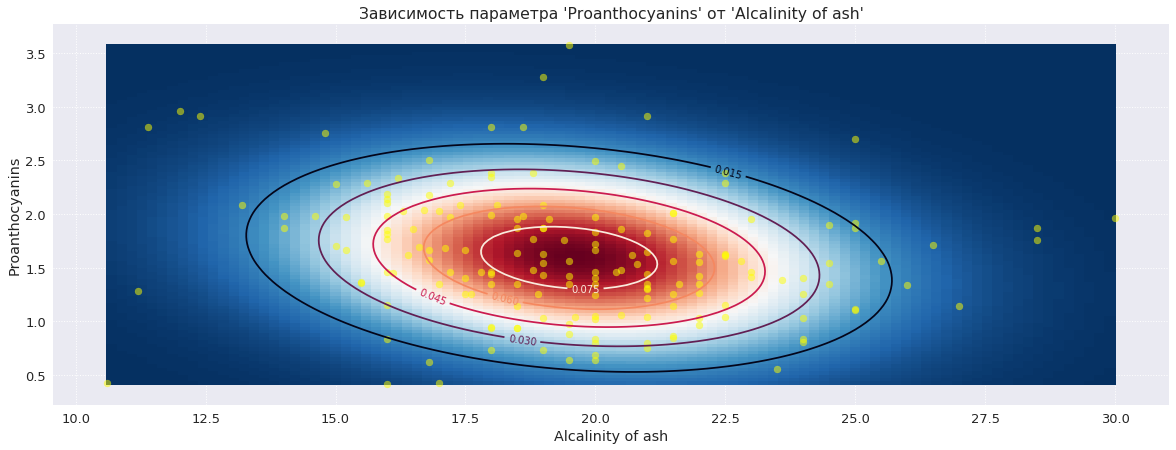

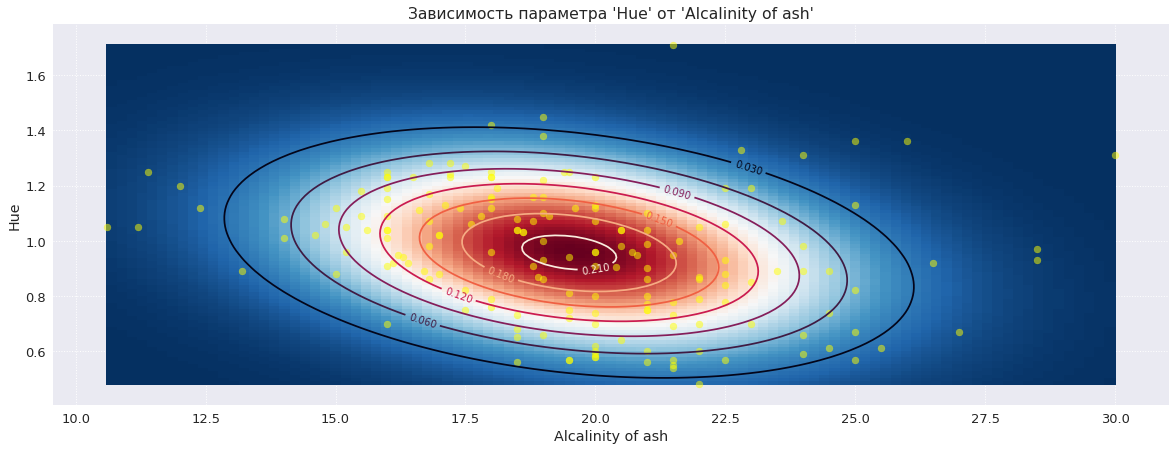

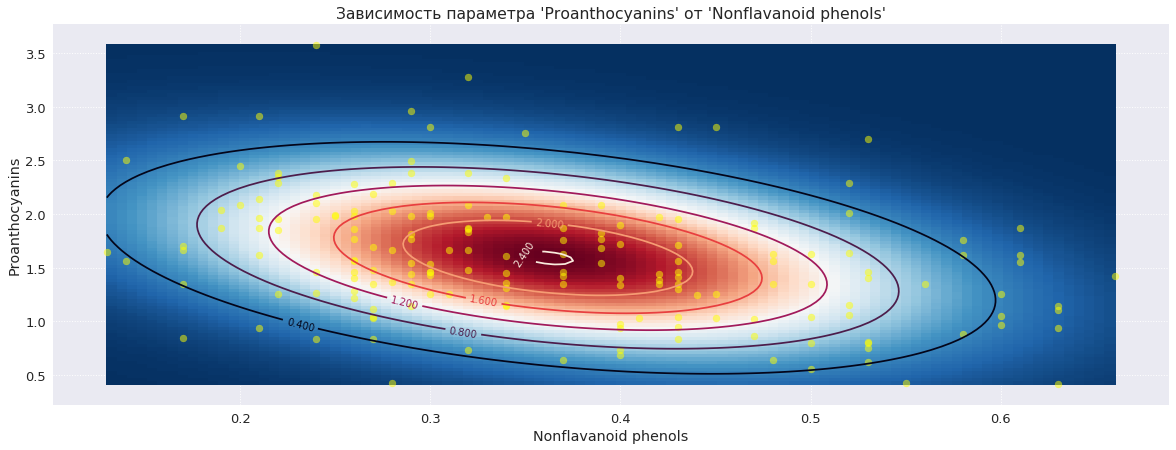

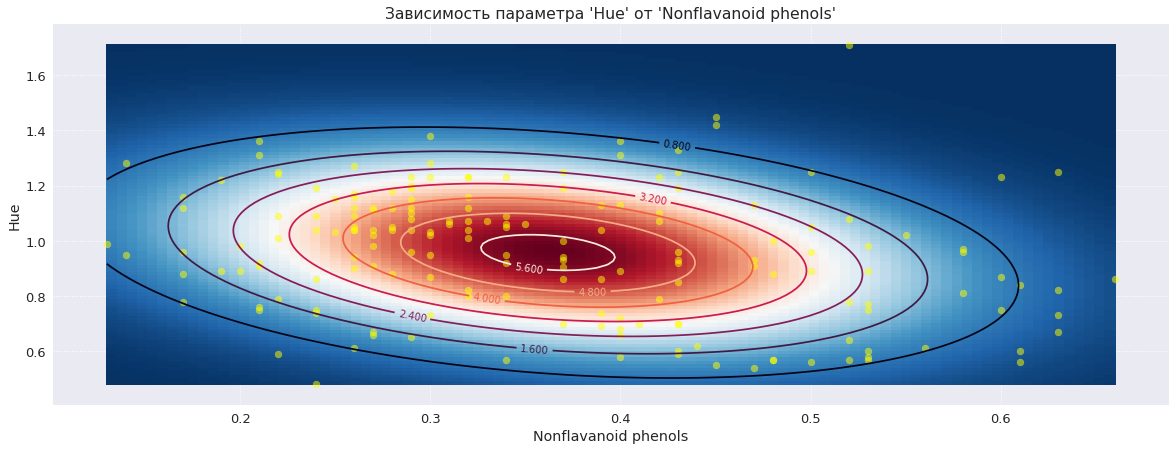

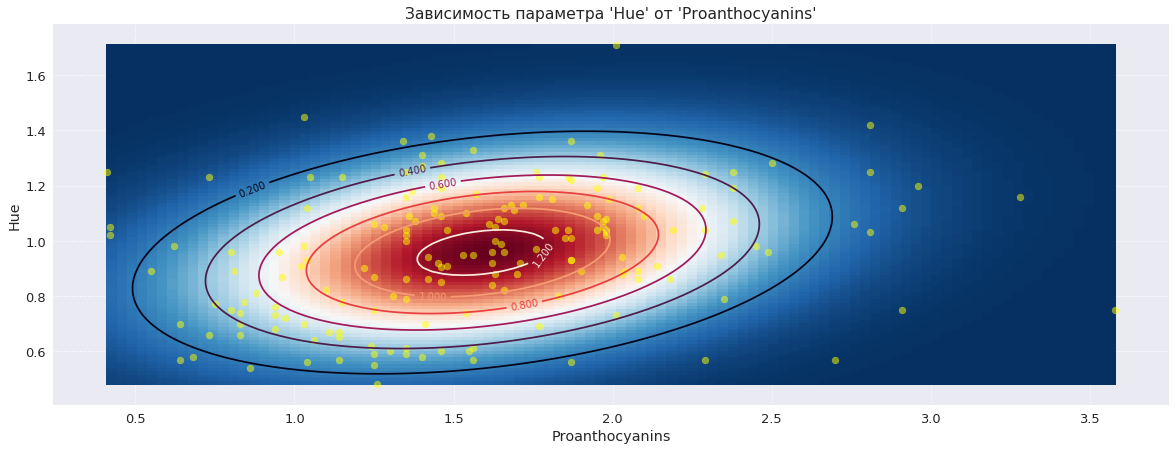

In [7]:
def drow_dependence(distribution, data_x, data_y, labels):
    """Рисует двумерное распределение distribution
    и наносит выборку (data_x, data_y)"""
    
    
    # Устанавливаем вполне естественные параметры ограничения на график
    xlims = [data_x.min(), data_x.max()]
    ylims = [data_y.min(), data_y.max()]
    
    # Задаём сечение на осях
    xlist = np.linspace(xlims[0], xlims[1], 100)
    ylist = np.linspace(ylims[0], ylims[1], 100)
    
    # И создаём саму сетку
    X, Y = np.meshgrid(xlist, ylist)
    
    # Вычисляем значение плотности в узлах сетки
    density_values = distribution.pdf(np.dstack((X, Y)))
    
    
    # Объявляем новый график и подписываем его
    plt.figure(figsize=(20, 7))
    plt.title('Зависимость параметра \'{}\' от \'{}\''.format(labels[1],
                                                              labels[0]))
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
            
    # Рисуем плотность
    plt.pcolormesh(X, Y, density_values, cmap='RdBu_r')
    
    # И наносим линии уровня
    level_lines = plt.contour(X, Y, density_values)
    plt.clabel(level_lines)
    
    # Наносим соответственно данные выборки
    plt.scatter(data_x, data_y, alpha=0.5, label='Выборка', color="yellow")
    plt.grid(ls=':')
    plt.show()
    
    
for i in range(4):
    for j in range(4):
        if i >= j:
            continue
        
        
        # найдём плотность двумерного нормального распределения
        # для текущих свойств
        sub_mu = [mu[i], mu[j]]
        sub_sigma = [[sigma[i][i], sigma[i][j]],
                     [sigma[j][i], sigma[j][j]]]
        distribution = sps.multivariate_normal(mean=sub_mu,
                                               cov=sub_sigma)
        
        # Вычисляем прочие параметры
        data_x = some_destributions_np[:, i]
        data_y = some_destributions_np[:, j]
        labels = [destribution_columns[i], destribution_columns[j]]
        
        # Отрисовываем график
        drow_dependence(distribution, data_x, data_y, labels)
        
        

**Выводы:** Можно заметить, что внутри каждого кольца уровня точки выборки расположены с одинаковой плотностью. Причём более плотно к центру. Значит можно сделать вывод, что нормальные распределения, по найденым параметрам с помощью ОМП, хорошо описывают зависимость данных.

__________________
### Задача 2.
На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенератора сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность:
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k} I (x \geq 0),$$
где $\theta = (k, \lambda)$ &mdash; двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится.  В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

За распределение Вейбулла отвечает класс `weibull_min` из модуля `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

*Выборка:*  Создайте выборку по значениям среднесуточной скорости ветра на некоторой местности для нескольких лет (не менее трех).  Выборку можно получить <a href="http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind_2018.html">отсюда</a>, используя скрипт `script.py`. Откройте командную строку в той же папке, запустите скрипт (`python3 script.py`) и следуйте инструкциям; на вопрос `Pick data type:` надо ответить `5`, чтобы выбрать данные по ветру. В полученном csv-файле надо выбрать данные (столбец `Mean`) за некоторый промежуток времени.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

Двумерную сетку можно создать с помощью функции `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, затем сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать трехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [8]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

**Решение:**

Проведём загрузку данных:


In [9]:
# Открываем таблицу с данными
winds = pd.read_csv('wind.csv')

# Выбираем информацию с 2013 года с непустыми скоростями ветра
sample = np.array(winds[winds.Year > 2012][winds.Mean != None]['Mean'])

Объявим функцию поиска ОМП на заданной сетке:

In [10]:
def weibull_min_on_grid(K, L):
    """Ищет минимум на заданной сетке 
    для функции правдоподобия с k = K и \lambda = L"""
    
    # Зададим само распределение Вейбулла:
    distribution = sps.weibull_min(c=K[:,None,None], scale=L[None,:,None])
    
    # Посчитаем логарифмическую функцию правдоподобия на выборки sample
    pdf = distribution.logpdf(sample)
    likelihood = pdf.sum(axis=-1)

    opt = cool_argmax(likelihood)
    
    return (K[opt[0]], L[opt[1]])


Реализуем поиск ОМП с помощью поиска по двумерной сетки:

In [11]:
def get_grid(l, r, prec):
    """Производит разлиновку отрезка [l, r]
    с шириной одного подотрезка <= prec"""
    
    # Количество подотрезков с длиной <= prec
    seg_cnt = 1 + int((r - l) / prec)
    return np.linspace(l, r, seg_cnt + 1)

precision = 1e-5
k, l = 0, 0

klims = [1, 50]
llims = [1, 50]
curr_step = 1.


while curr_step > precision:
    # Организуем сетку с шириной клетки curr_step
    K = get_grid(klims[0], klims[1], curr_step)
    L = get_grid(llims[0], llims[1], curr_step)
    
    # Находим оптимальные значения
    k, l = weibull_min_on_grid(K, L)
    
    # переходим к более маленькой окрестности
    klims = [max(0, k - curr_step), k + curr_step]
    llims = [max(0, l - curr_step), l + curr_step]
    
    # уменшая при этом размер клетки
    curr_step /= 2

print("ОМП:\n k \t= {}\n lambda = {}".format(k, l))

ОМП:
 k 	= 2.636312255859375
 lambda = 4.619688720703125


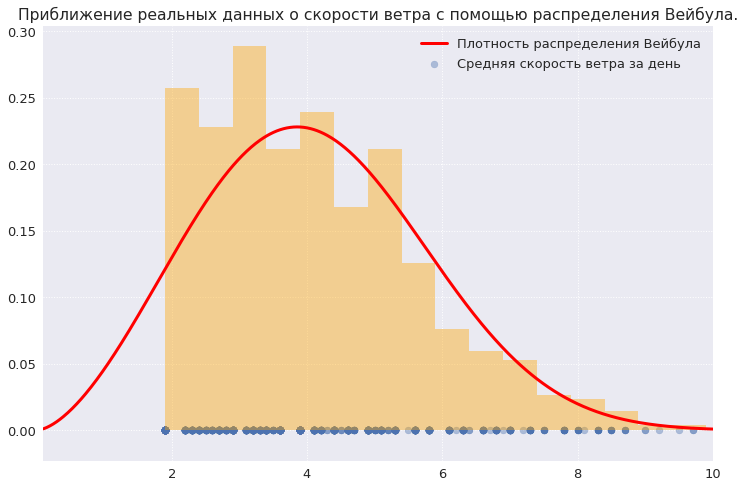

In [12]:
xmin, xmax = 0.1, 10
grid = np.linspace(xmin, xmax, 600)
pdf = sps.weibull_min(c=k, scale=l).pdf(grid)


# Объявляем и подписываем график
plt.figure(figsize=(12, 8))
plt.xlim(xmin, xmax)
plt.grid(ls=':')
plt.title('Приближение реальных данных о скорости ветра с помощью распределения Вейбула.')

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(len(sample)), alpha=0.4,
            label='Средняя скорость ветра за день')

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=20, normed=True, alpha=0.4, color='orange')

# рисуем график плотности
plt.plot(grid, pdf, color='red', lw=3,
         label='Плотность распределения Вейбула')

plt.legend()
plt.grid(ls=':')
plt.show()

*b).* Обозначим $\widehat{\theta} = \left(\widehat{\lambda}, \widehat{k}\right)$ &mdash; ОМП. Запишите уравнение правдоподобия (все частные производные в точке экстремума логарифмической функции правдоподобия должны быть равны $0$). Используя одно из равенств, можно выразить $\widehat{\lambda}$ через значения $X_1, \dots, X_n, \widehat{k}$; подставив это выражение в другое равенство, получить уравнение на $\widehat{k}$. Решите это уравнение приближенно с помощью метода Ньютона, рассказанного в рамках курса методов оптимизации, и получите $\widehat{k}$, а значит, и $\widehat{\lambda}$.

**Решение:**

In [ ]:
<...>

**Вывод:** <...>

__________________
### Задача 3.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $MSE_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$MSE_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta); \\
\begin{align*}
\textrm{bias}_{\widehat{\theta}} (\theta) & = \mathsf{E}_{\theta} \widehat{\theta} - \theta; \\
\textrm{var}_{\widehat{\theta}} (\theta) & = \mathsf{D}_{\theta} \widehat{\theta}.
\end{align*}$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** Используя посчитанные на семинаре матожидание и дисперсию $X_{(n)}$:
$$
\begin{align*}
    \mathsf{E}_{\theta}X_{(n)} &= \frac{\theta n}{n + 1} \\
    \mathsf{D}_{\theta}X_{(n)} &= \frac{\theta ^ 2 n}{(n + 1)^2(n + 2)}
\end{align*}
$$
Найдём bias-variance разложение для оценки $\widehat{\theta} = cX_{(n)}$:
$$
\begin{align*}
    \textrm{bias}_{\widehat{\theta}} (\theta) & = c \mathsf{E}_{\theta} X_{(n)} - \theta = \frac{c\theta n}{n + 1} -\theta\\
    \textrm{var}_{\widehat{\theta}} (\theta) & = c^2\mathsf{D}_{\theta} X_{(n)} = \frac{c^2\theta ^ 2 n}{(n + 1)^2(n + 2)}
\end{align*}
$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое $c$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

Из прошлых заданий знаем, что:
* Несмещённость имеется при $c = \frac{n + 1}{n}$
* ОМП достигается при $c = 1$

In [13]:
def dependences_from_c(plot, grid, Y_list, Y_labels, c_list, c_labels, ls_list):
    
    for i in range(len(Y_list)):
        plot.plot(grid, Y_list[i], label=Y_labels[i])
    
    for i in range(len(c_list)):
        plot.axvline(c_list[i], ls=ls_list[i], label=c_labels[i])
    
    
    plot.set_xlabel('c', fontsize=15)

In [14]:
n = 5
theta = 1
def bias(c):
    return theta*(c * n / (n + 1) - 1)

def variance(c):
    return c**2 * theta**2 * n / ((n+1)**2 * (n+2))

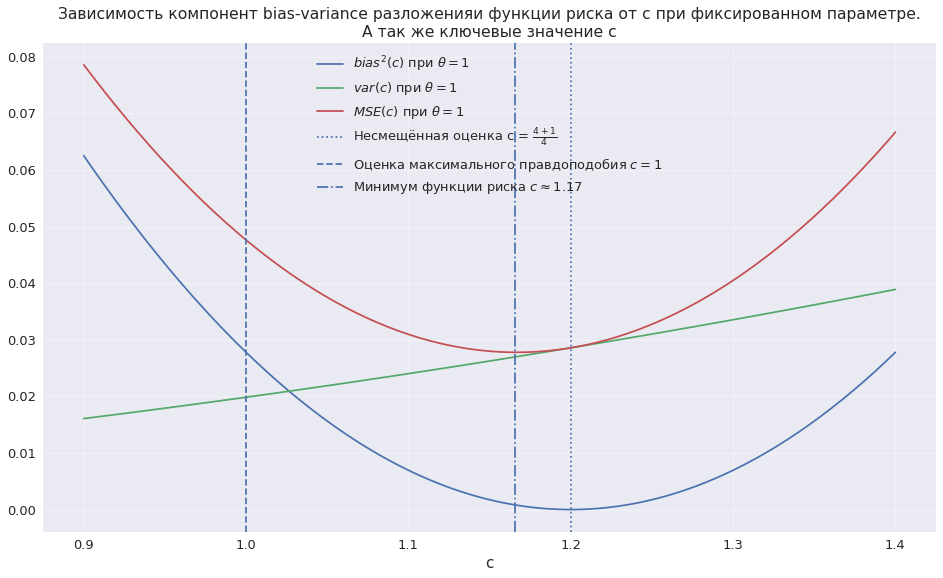

In [15]:
xlims = [0.9, 1.4]
ylims = [0, 0.08]

# генерируем набор c
grid = np.linspace(xlims[0], xlims[1], 300)

# считаем для каждого c: bias^2, variance и MSE
bias_y = bias(grid) ** 2
variance_y = variance(grid)
MSE = bias_y + variance_y

# посчитаем координаты с для:
# Несмещённости
c_unbaised = (n + 1) / n
# ОМП
mle = 1
# Минимума функции риска
min_mse = grid[cool_argmax(-MSE)]

# Зададим пораметры для построения графика
Y = [bias_y, variance_y, MSE]
Y_labels = ['$bias^2(c)$ при $\\theta = {}$'.format(theta),
            '$var(c)$ при $\\theta = {}$'.format(theta), 
            '$MSE(c)$ при $\\theta = {}$'.format(theta)]
c_list = [c_unbaised, mle, min_mse]
c_labels = ['Несмещённая оценка c = $\\frac{4 + 1}{4}$',
            'Оценка максимального правдоподобия $c = 1$', 
            'Минимум функции риска $c \\approx {0:.2f}$'.format(min_mse)]
ls_list = [':', '--', '-.']
tmp, (plot) = plt.subplots(1, 1, figsize=(16, 9))
dependences_from_c(plot, grid, Y, Y_labels, c_list, c_labels, ls_list)
plot.set_title('Зависимость компонент bias-variance разложения' +
               'и функции риска от c при фиксированном параметре.\n' + 
               'А так же ключевые значение c')
plot.grid(ls=':')
plot.legend()
tmp.show()

**Вывод: ** 
* Минимум функции риска даёт $c \approx 1.17$
* Можно заметить, что bias ведёт себя как квадратичная функция, а variance, как линейная.
* Можем наблюдать три отличительных вида оценок:

1) $c=\frac{n + 1}{n}$~--- несмещённая, причём в этой точке пересекаются графики функции риска и variance, так как компонента bias зануляется из-за несмещённости

2) Оценка максимального правдоподобия: такое $c$, для которого при $\theta = cX_{(n)}$ функция правдоподобия принимает максимальное значение

3) Оценка функции риска: такая точка $c$, при которой функция риска MSE_{cX_{(n)}} минимальна

*b)* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:**  Используя посчитанные на семинаре и впредыдущем практикуме, матожидание и дисперсию $s^2$:
$$
\begin{align*}
    \mathsf{E}_{\theta} S^2 &=  \frac{n-1}{c} \sigma^2\\
    \mathsf{D}_{\theta} S^2 &= 2 \sigma^4 \frac{n - 1}{n ^ 2}
\end{align*}
$$

Найдём bias-variance разложение оценки $\widehat{\theta} = \frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2$:
$$
\begin{align*}
    \textrm{bias}_{\widehat{\theta}} (\theta) & = \sigma^2(\frac{n-1}{c} -1)\\
    \textrm{var}_{\widehat{\theta}} (\theta) & = \frac{n^2}{c^2}\mathsf{D}_{\theta} \widehat{\theta} = 2 \sigma^4 \frac{n - 1}{c ^ 2}
\end{align*}
$$


Повторите исследование, аналогичное пункту *a)* для $\sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Решение: **

* Из теоретического домашнего задания известно, что ОМП достигается при $c=n$
* Также видно из формулы $\mathsf{E}_{\theta} S^2 =  \frac{n-1}{c} \sigma^2$, что оценка несмещённая при $c=n-1$

In [16]:
n_list = [5, 10]
theta = 1
def bias(c, n):
    return theta*((n-1) / c - 1)

def variance(c, n):
    return 2. * theta ** 2 * (n-1) / (c**2)

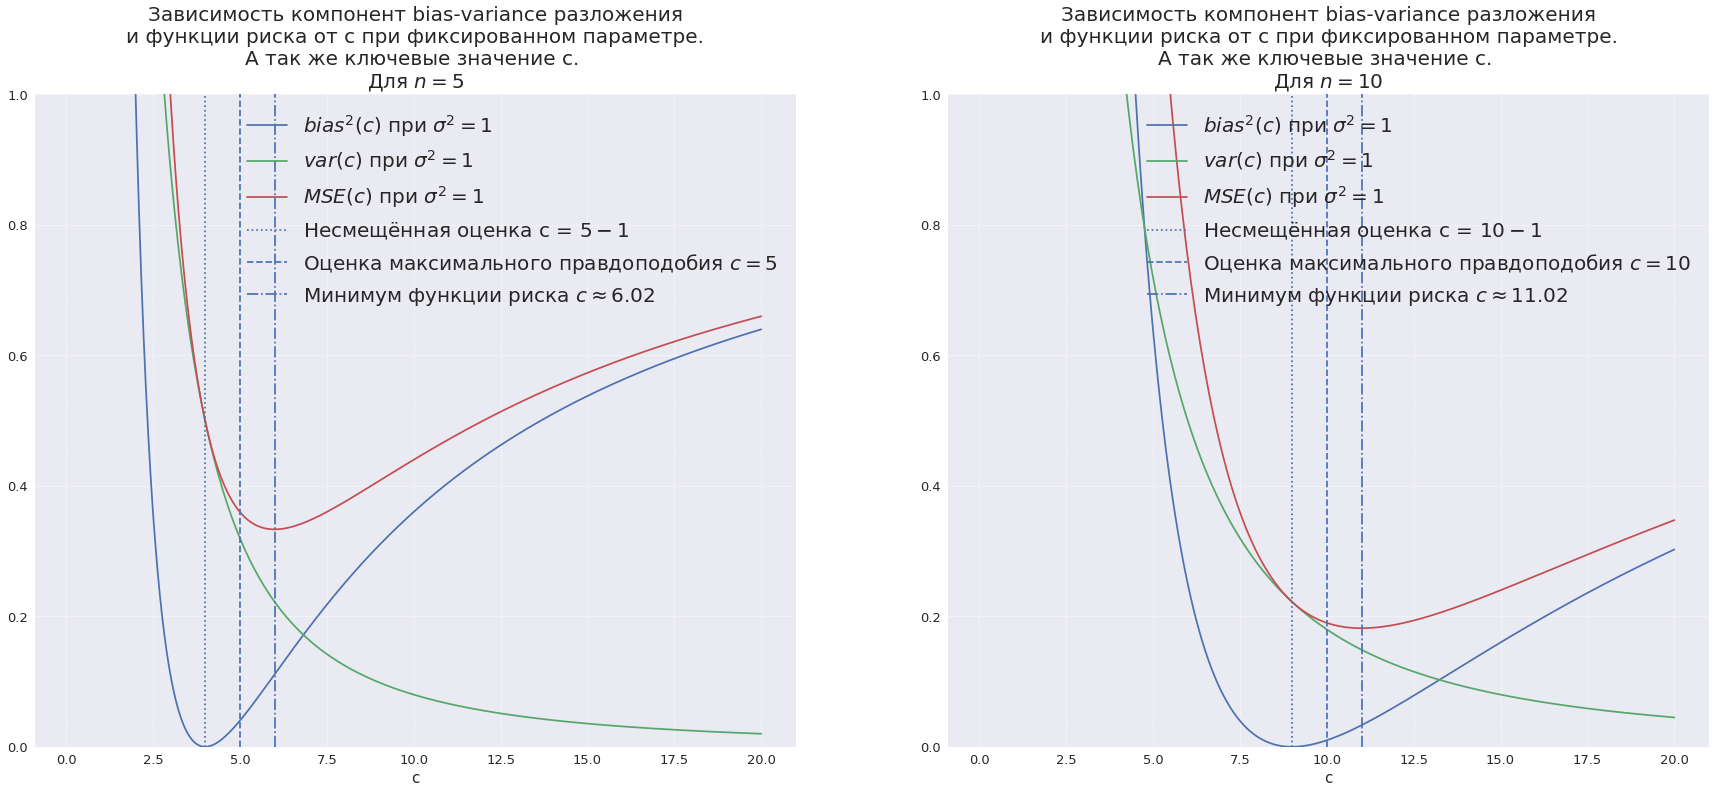

In [17]:
xlims = [0.1, 20]
ylims = [0, 1]

# генерируем набор c
grid = np.linspace(xlims[0], xlims[1], 300)

tmp, plots = plt.subplots(1, 2, figsize=(30, 12))

for n, plot in zip(n_list, plots):
    # считаем для каждого c: bias^2, variance и MSE
    bias_y = bias(grid, n) ** 2
    variance_y = variance(grid, n)
    MSE = bias_y + variance_y
    
    # посчитаем координаты с для:
    # Несмещённости
    c_unbaised = n-1
    # ОМП
    mle = n
    # Минимума функции риска
    min_mse = grid[cool_argmax(-MSE)]

    # Зададим пораметры для построения графика
    Y = [bias_y, variance_y, MSE]
    Y_labels = ['$bias^2(c)$ при $\\sigma^2 = {}$'.format(theta),
                '$var(c)$ при $\\sigma^2 = {}$'.format(theta), 
                '$MSE(c)$ при $\\sigma^2 = {}$'.format(theta)]
    c_list = [c_unbaised, mle, min_mse]
    c_labels = ['Несмещённая оценка c = ${0}-1$'.format(n),
                'Оценка максимального правдоподобия $c = {0}$'.format(n), 
                'Минимум функции риска $c \\approx {0:.2f}$'.format(min_mse)]
    ls_list = [':', '--', '-.']
    
    dependences_from_c(plot, grid, Y, Y_labels, c_list, c_labels, ls_list)
    plot.set_title('Зависимость компонент bias-variance разложения\n' +
                   'и функции риска от c при фиксированном параметре.\n' + 
                   'А так же ключевые значение c. \nДля $n={0}$'.format(n), fontsize=20)
    plot.grid(ls=':')
    plot.legend(fontsize=20)
    plot.set_ylim(*ylims)
    

tmp.show()

**Вывод:** Минимумы функции риска достигаются при $c = n + 1$, а несмещённая при $c = n - 1$

*c)* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $Exp (\theta)$. Рассмотрим класс оценок $\mathcal{K} = \left\{\frac{c}{X_1 + \dots + X_n}, \; c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:**  Используя посчитанные на семинаре и впредыдущем практикуме, матожидание и дисперсию $\frac{1}{\overline{X}}$:
$$
\begin{align*}
    \mathsf{E}_{\theta} \frac{1}{\overline{X}} &= \frac{\theta n}{n-1}\\
    \mathsf{D}_{\theta} \frac{1}{\overline{X}} &= (\theta n)^2( \frac{1}{(n-1)(n-2)} - \frac{1}{(n-1)^2})
\end{align*}
$$

Найдём bias-variance разложение оценки $\widehat{\theta} = \frac{c}{X_1 + \dots + X_n}$:
$$
\begin{align*}
    \textrm{bias}_{\widehat{\theta}} (\theta) & = \theta(\frac{c}{n-1} -1)\\
    \textrm{var}_{\widehat{\theta}} (\theta) & = (\theta c)^2( \frac{1}{(n-1)(n-2)} - \frac{1}{(n-1)^2})
\end{align*}
$$


Повторите исследование, аналогичное пункту *c)* для $\theta = 1$ и $n = 7$. Не забудьте сделать выводы.

**Решение: **

* Из теоретического домашнего задания известно, что ОМП достигается при $c=n$
* Также видно из формулы $\mathsf{E}_{\theta} \frac{1}{\overline{X}} = \frac{\theta n}{n-1}$, что оценка несмещённая при $c=n-1$

In [18]:
n = 7
theta = 1
def bias(c):
    return theta * (c / (n - 1) - 1)

def variance(c):
    return c ** 2 * theta ** 2 * (1 / (n - 1) / (n - 2) - 1 / (n - 1) ** 2)

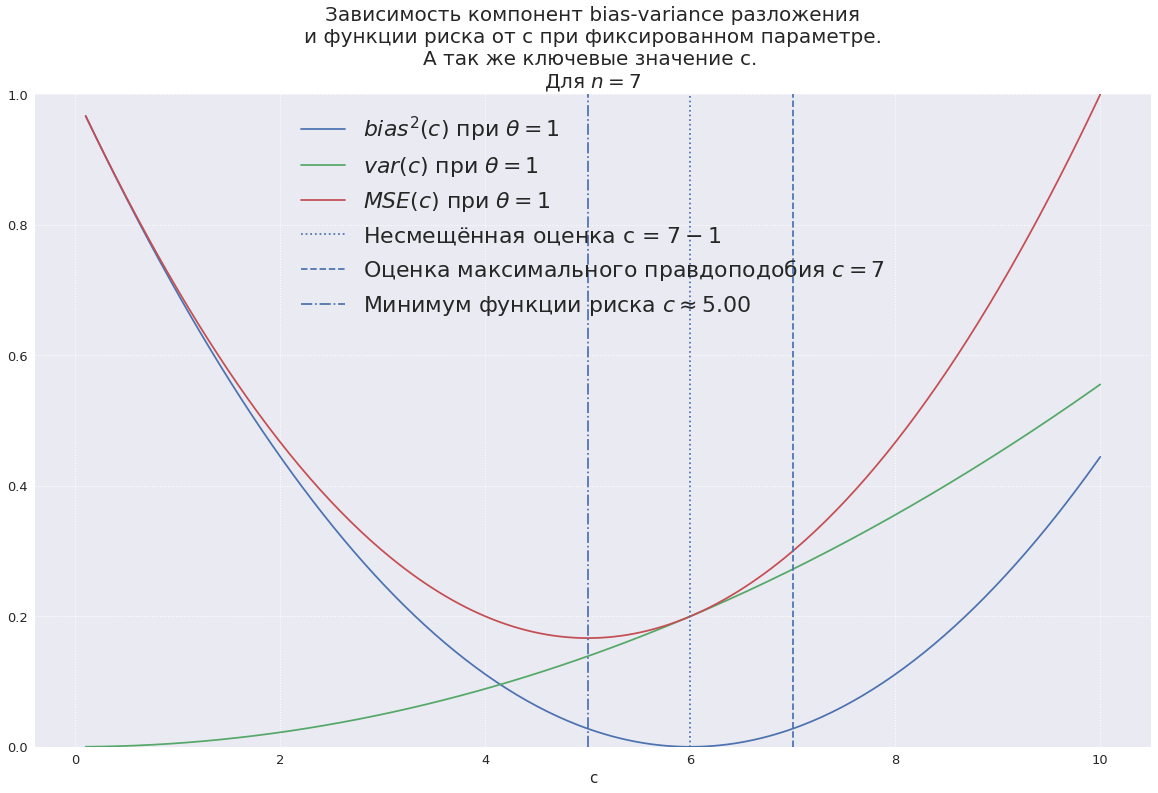

In [19]:
xlims = [0.1, 10]
ylims = [0, 1]

# генерируем набор c
grid = np.linspace(xlims[0], xlims[1], 300)

# считаем для каждого c: bias^2, variance и MSE
bias_y = bias(grid) ** 2
variance_y = variance(grid)
MSE = bias_y + variance_y

# посчитаем координаты с для:
# Несмещённости
c_unbaised = n-1
# ОМП
mle = n
# Минимума функции риска
min_mse = grid[cool_argmax(-MSE)]

tmp, (plot) = plt.subplots(1, 1, figsize=(20, 12))
# Зададим пораметры для построения графика
Y = [bias_y, variance_y, MSE]
Y_labels = ['$bias^2(c)$ при $\\theta = {}$'.format(theta),
            '$var(c)$ при $\\theta = {}$'.format(theta), 
            '$MSE(c)$ при $\\theta = {}$'.format(theta)]
c_list = [c_unbaised, mle, min_mse]
c_labels = ['Несмещённая оценка c = ${0}-1$'.format(n),
            'Оценка максимального правдоподобия $c = {0}$'.format(n), 
            'Минимум функции риска $c \\approx {0:.2f}$'.format(min_mse)]
ls_list = [':', '--', '-.']

dependences_from_c(plot, grid, Y, Y_labels, c_list, c_labels, ls_list)
plot.set_title('Зависимость компонент bias-variance разложения\n' +
               'и функции риска от c при фиксированном параметре.\n' + 
               'А так же ключевые значение c. \nДля $n={0}$'.format(n), fontsize=20)
plot.grid(ls=':')
plot.legend(fontsize=22)
plot.set_ylim(*ylims)
    

tmp.show()

**Вывод: ** 
* Минимум функции риска достигается в точке $c = n - 2$. 
* Несмещённая оценка при с = n - 1

Сделайте вывод по результатам пунктов *a)*, *b)*, *c)*.

**Общий вывод:** Можно заметить, что в точках несмещённых оценок функция риска не минимальна, это связано с тем, что несмещённость никак не учитывает дисперсию в выборке

__________________
### Задача 4.
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$.

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.

В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$

Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

*1.* Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Вычислите долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

Найдём фунции риска для данных оценок:
* $MSE_{\overline{X}}(\theta)$. Используем bias-variance разложение:
$$
MSE_{\overline{X}}(\theta) 
= \mathsf{D}_{\theta}\overline{X} + (\mathsf{E}_{\theta}\overline{X}-\theta)^2
= \mathsf{D}_{\theta}\overline{X}
= \frac{1}{n^2}\mathsf{D}_\theta(X_1 + \dots + X_n) 
= \frac{\theta(1-\theta)}{n}
$$
* $MSE_{\widetilde{\theta}}(\theta)$. На семинаре была получена следующая формула:
$$
MSE_{\widetilde{\theta}}(\theta) = \frac{1}{4(1 + \sqrt n)^2}
$$

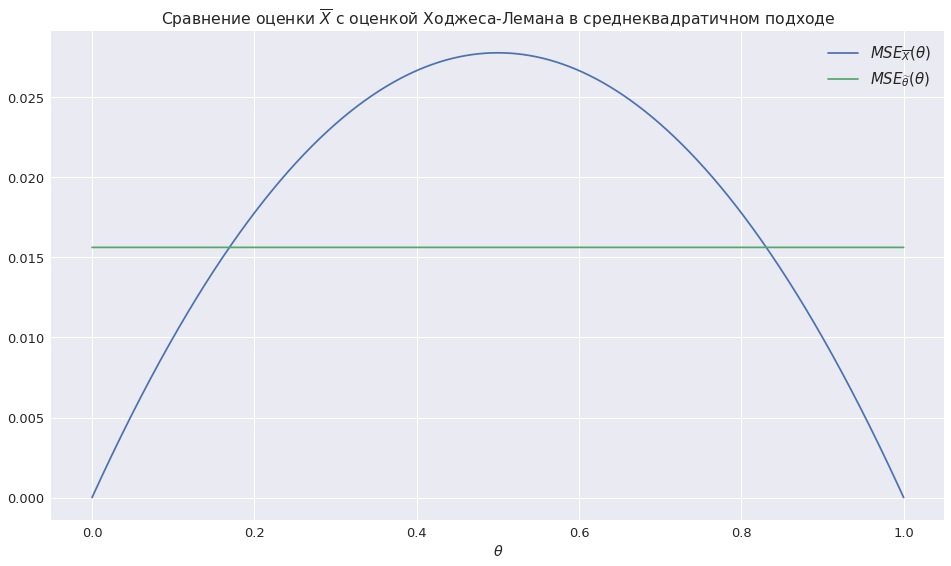

Оценка Ходжеса-Лемана лучше в 0.6612 случаях


In [20]:
n = 9
k = 5000
theta = np.linspace(0, 1, k)

#  Считаем значение ошибок каждой из оценок
mse1 = theta * (1 - theta) / n
mse2 = np.ones(k) / (4 * (1 + n ** 0.5)**2)

# Задаём основные параметры графика
plt.figure(figsize=(16, 9))
plt.title(r'Сравнение оценки $\overline{X}$ с оценкой Ходжеса-Лемана в среднеквадратичном подходе')
plt.xlabel(r'$\theta$')

# Наносим ошибку для среднеарифметической оценки
plt.plot(theta, mse1, label=r'$MSE_{\overline{X}}(\theta)$', )
# Нааносим ошибку для оценки Ходжеса-Лемана
plt.plot(theta, mse2, label=r'$MSE_{\widetilde{\theta}}(\theta)$')

plt.legend(fontsize=15)
plt.show()

# Вычисление доли тех тет, при которых 
# среднеарифметическая оценка хуже оценки Ходжеса-Лемана
share = ((mse2 - mse1) < 0).sum() / k

print('Оценка Ходжеса-Лемана лучше в {} случаях'.format(share))

**Ответ:** Таким образом оценка Ходжеса-Лемана даёт меньший риск в среднеквадратичном подходе в 66% случаях


*2.* Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение: **

In [21]:
n = 9
k = 1000

theta = sps.uniform().rvs(k)
X = sps.bernoulli(theta).rvs(size=(n, k)).T

theta1 = X.mean(axis=1)
theta2 = theta1 + 1 / (1 + n**0.5) * (0.5 - theta1)

share = (np.absolute(theta1 - theta) > np.absolute(theta2 - theta)).sum() / k

print('Оценка Ходжеса-Лемана оказалась ближе в {} случаях'.format(share))

Оценка Ходжеса-Лемана оказалась ближе в 0.481 случаях


**Вывод:** Оценка получилось другой. Это можно объяснить тем, что подход для сравнения оценок использовался иной, нежели в первом пункте. В этом мы использовали байесовский подход, а не функции риска.

*3.*  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрично относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.

Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ оказажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода прямоугольников. Сделайте выводы.

**Решение:**

In [22]:
def f(theta, n):
    if theta > 1 / 2:
        theta = 1 - theta
        
    d = 1 / (4 * (1 + n ** 0.5))
    ans = sps.binom(n, theta).cdf(n / 2)
    ans -= sps.binom(n, theta).cdf(n * (theta - d) / (1 - 2 * d))
    return 1 - ans

def integrate_rectangle(f, low, high, n, arg):
    """Метод прямоугольников"""
    # количество интегрлов
    d = len(low)

    # число точек для каждой координаты
    n_for_one_dim = int(n ** (1 / d))

    if not n_for_one_dim:
        return 0

    # разбиения отрезков интегрирования на равные отрезки
    ranges = []
    for (a, b) in zip(low, high):
        sigment_length = 1. * (b - a) / (n_for_one_dim)
        ranges.append(a + np.arange(n_for_one_dim + 1) * sigment_length)
    ranges = np.array(ranges)

    # вычисление центров этих разбиений
    ranges_of_centers = []
    for dim_grid in ranges:
        ranges_of_centers.append((dim_grid[1:] + dim_grid[:-1]) / 2)

    # получение всех точек сетки через вызов np.meshgrid
    centers = np.stack(np.meshgrid(*ranges_of_centers)).reshape(d, -1).T

    # длины длины отрезков по каждой координате
    block_lengths = (high - low) * 1. / n_for_one_dim

    # вычисление значение функции в точках сетки
    np_f = np.vectorize(f)
    f_values = np_f(centers, arg) * block_lengths.prod()

    # ответ
    return f_values.sum()

def P(n):
    return integrate_rectangle(f, np.array([0]), np.array([1]), 100, n)

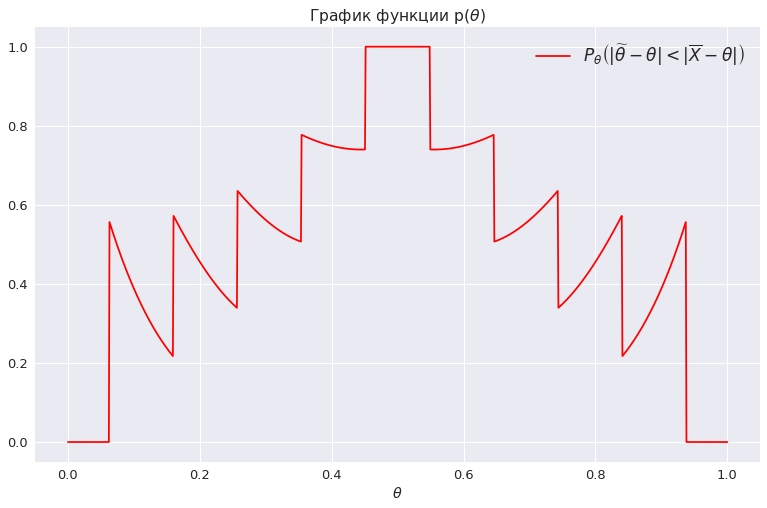

Вероятность того, что оценка Ходжеса-Лемана оказалась лучше есть: 0.51


In [23]:
n = 9
k = 1000

theta = np.linspace(0, 1, k)
p = np.vectorize(f)(theta, n)

# Объявляем график и подписываем
plt.figure(figsize=(13, 8))
plt.title(r'График функции p($\theta$)')
plt.xlabel(r'$\theta$')

# Строим график вероятности
plt.plot(np.linspace(0, 1, 1000), p, color='r',
         label=r'$P_{\theta} \left(\left|\widetilde{\theta}' + 
         r' - \theta \right| < \left| \overline{X} - \theta \right| \right)$')

plt.legend(fontsize=17)
plt.show()

# Вычисляем эту вероятность методом прямоугольников
area = P(n)

print('Вероятность того, что оценка Ходжеса-Лемана оказалась лучше есть: {0:.2f}'.format(area))

**Ответ:** Получается, что искомая вероятность есть $\int\limits_0^1 p(t) dt \approx 0.51$. Что подтверждается результатом предыдущего пункта

*4.* Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

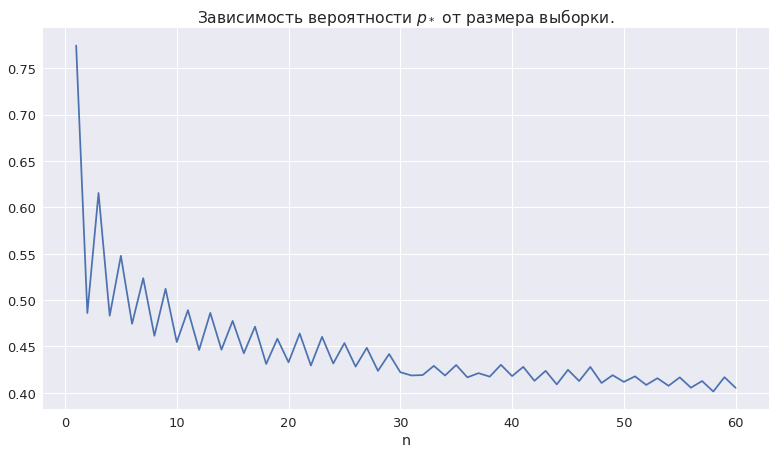

In [24]:
MAX_N = 60

grid = np.arange(1, MAX_N + 1)
p_list = np.vectorize(P)(grid)

# Обхявляем график и подписываем
plt.figure(figsize=(13, 7))
plt.title('Зависимость вероятности $p_*$ от размера выборки.')
plt.xlabel('n')

# Само построение
plt.plot(grid, p_list, label='$p_*$')
plt.show()

**Ответ:** Замечаем, что при увеличении размера выборки, вероятность того, что оценка Холжеса-Лемана окажется ближе к истинному значению уменьшается, и с некоторого момента такое событие становится менее вероятно, чем то что среднеарифметическая оценка окажется ближе